<a href="https://colab.research.google.com/github/manuship/820-Project-/blob/Ryan-Code/Team_project_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installs

# notebook/colab
! pip install scikit-plot

In [ ]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.tree import DecisionTreeClassifier

import scikitplot as skplt
from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform


# sklearn does have some functionality too, but mostly a wrapper to scipy
#sklearn is used for almost all the preprocessing in this course
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

from matplotlib import cm

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
df.shape
#1338 rows and 7 columns

(1338, 7)

In [ ]:
#categorize age
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 25), 'age_cat'] = 'Early Twenty'
    col.loc[(col['age'] > 25) & (col['age'] <= 35), 'age_cat'] = 'Late Twenty'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [ ]:
df['weight_condition'] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_cat', 'weight_condition'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   object 
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   object 
 5   region            1338 non-null   object 
 6   charges           1338 non-null   float64
 7   age_cat           1338 non-null   object 
 8   weight_condition  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [ ]:
df.dtypes
obj_df = df.select_dtypes(include=['object'])
obj_df.head()

,sex,smoker,region,age_cat,weight_condition
0,female,yes,southwest,Early Twenty,Overweight
1,male,no,southeast,Early Twenty,Obese
2,male,no,southeast,Late Twenty,Obese
3,male,no,northwest,Late Twenty,Normal Weight
4,male,no,northwest,Late Twenty,Overweight


In [ ]:
obj_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
obj_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
obj_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
cleanup_nums = {'sex':{'male':0,'female':1},
                 'smoker':{'no':0,'yes':1},
                'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3},
                'age_cat':{'Early Twenty':0,'Late Twenty':1,'Senior Adult':2,'Elder':3},
                'weight_condition':{'Underweight':0,'Normal Weight':1,'Overweight':2,'Obese':3}}

In [ ]:
df = df.replace(cleanup_nums)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,1,27.900,0,1,1,16884.92400,0,2
1,18,0,33.770,1,0,0,1725.55230,0,3
2,28,0,33.000,3,0,0,4449.46200,1,3
3,33,0,22.705,0,0,2,21984.47061,1,1
4,32,0,28.880,0,0,2,3866.85520,1,2


In [ ]:
df.info()
#sex, smoker, and region converted to ints
#no null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   region            1338 non-null   int64  
 6   charges           1338 non-null   float64
 7   age_cat           1338 non-null   int64  
 8   weight_condition  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


               age          sex  ...      age_cat  weight_condition
count  1338.000000  1338.000000  ...  1338.000000       1338.000000
mean     39.207025     0.494768  ...     1.503737          2.330344
std      14.049960     0.500160  ...     1.015394          0.804804
min      18.000000     0.000000  ...     0.000000          0.000000
25%      27.000000     0.000000  ...     1.000000          2.000000
50%      39.000000     0.000000  ...     2.000000          3.000000
75%      51.000000     1.000000  ...     2.000000          3.000000
max      64.000000     1.000000  ...     3.000000          3.000000

[8 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


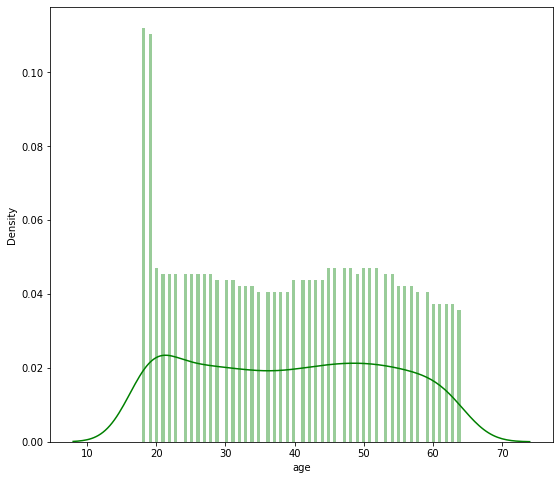

In [ ]:
print(df.describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

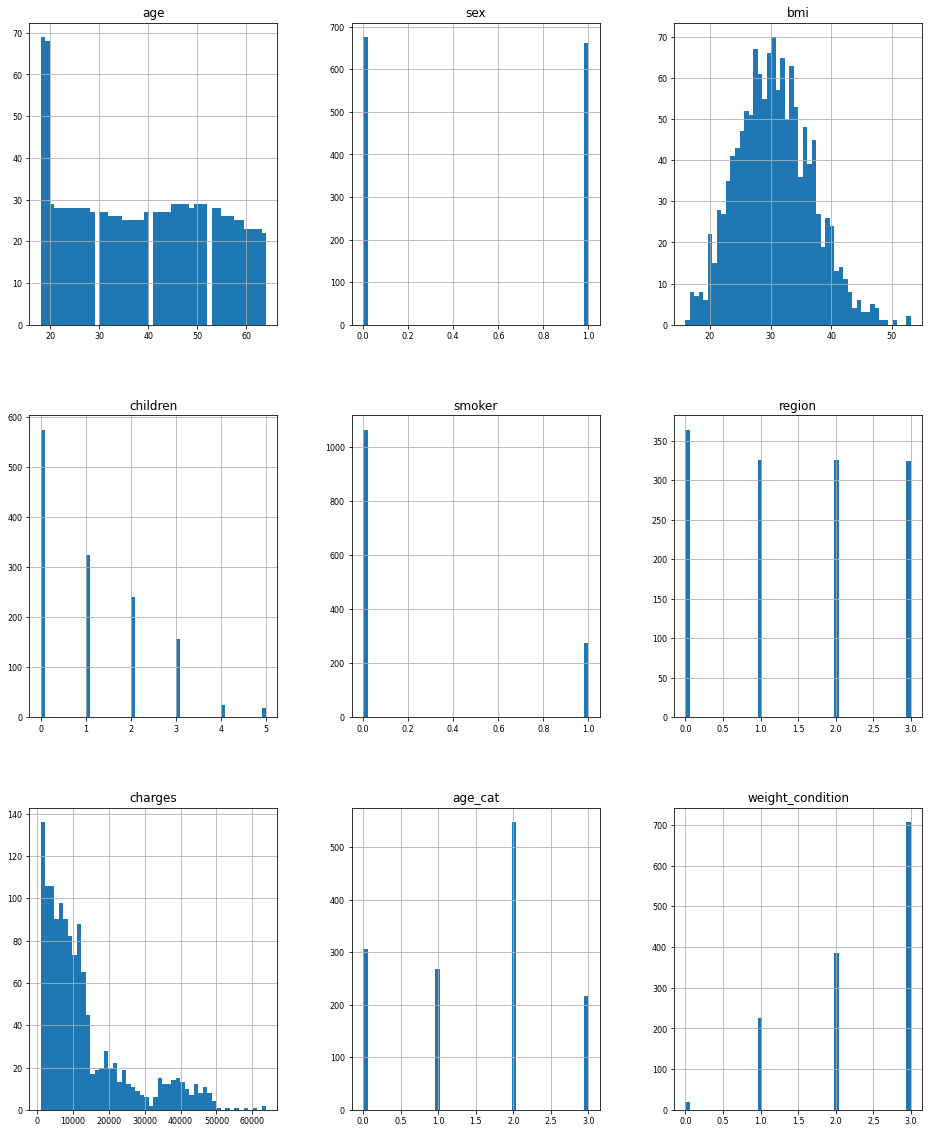

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 
#4 times as many non smokers as smokers
#regions are almost equally distributed with Southeast being slightly more
#age is nearly uniform distributed with a huge spike in 20 year olds
#bmi is normally distributed
#children and charges both decrease in distribution as they get bigger

In [ ]:
df_corr = df.corr()['charges'][:-1] # -1 because the last row is charges
strong_corr_vars = df_corr[abs(df_corr) > 0.2].sort_values(ascending=False) #sorting for only strongly correlated variables to charges
print("There is {} strongly correlated values with insurance charges:\n{}".format(len(strong_corr_vars), strong_corr_vars))

#The only variable with over 50% correlation to the charges is the smoking variable
#age is the second highest correlation with 29.9% correlation 

There is 4 strongly correlated values with insurance charges:
charges    1.000000
smoker     0.787251
age        0.299008
age_cat    0.273567
Name: charges, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


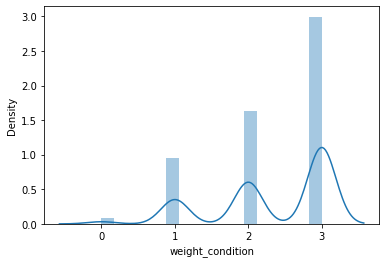

In [ ]:
sns.distplot(df.weight_condition)
#BMI looks normally distributed

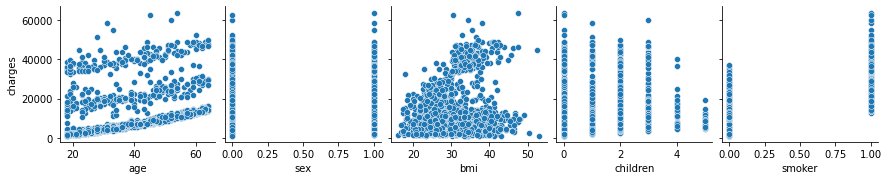

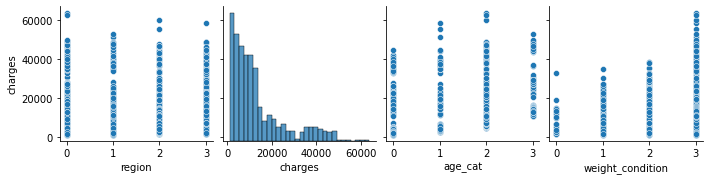

In [ ]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['charges'])
    
    # age seams to have a linear correlation and bmi has a loose linear correlation
    

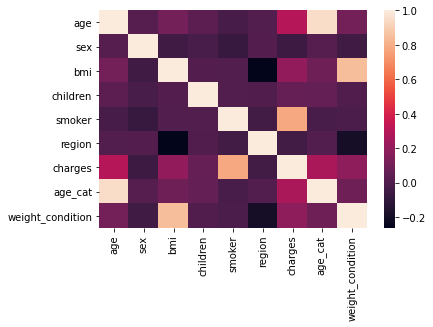

In [ ]:
#lets review correlation of all the current attributes 
sc = df.corr()
sns.heatmap(sc)
#based on the heatmap, we can see some high correlations between assets, liabilities, and shareholder equity 
#as well as price high, dividend per share and ROE

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# oe_style = OneHotEncoder()
# oe_results = oe_style.fit_transform(df[["region"]])
# pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)

#could be worth transforming the region into 4 variables and having them be 0,1 but doesn't appear to have high correlation with charges

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.455157,1.130197,0.0000,0.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
age_cat,1338.0,1.503737,1.015394,0.0000,1.00000,2.000,2.000000,3.00000
weight_condition,1338.0,2.330344,0.804804,0.0000,2.00000,3.000,3.000000,3.00000


In [ ]:
cdist = pdist(df.values)
cdist

array([15159.37303439, 12435.46686552,  5099.56896371, ...,
         378.28746864, 27511.56177674, 27133.44518367])

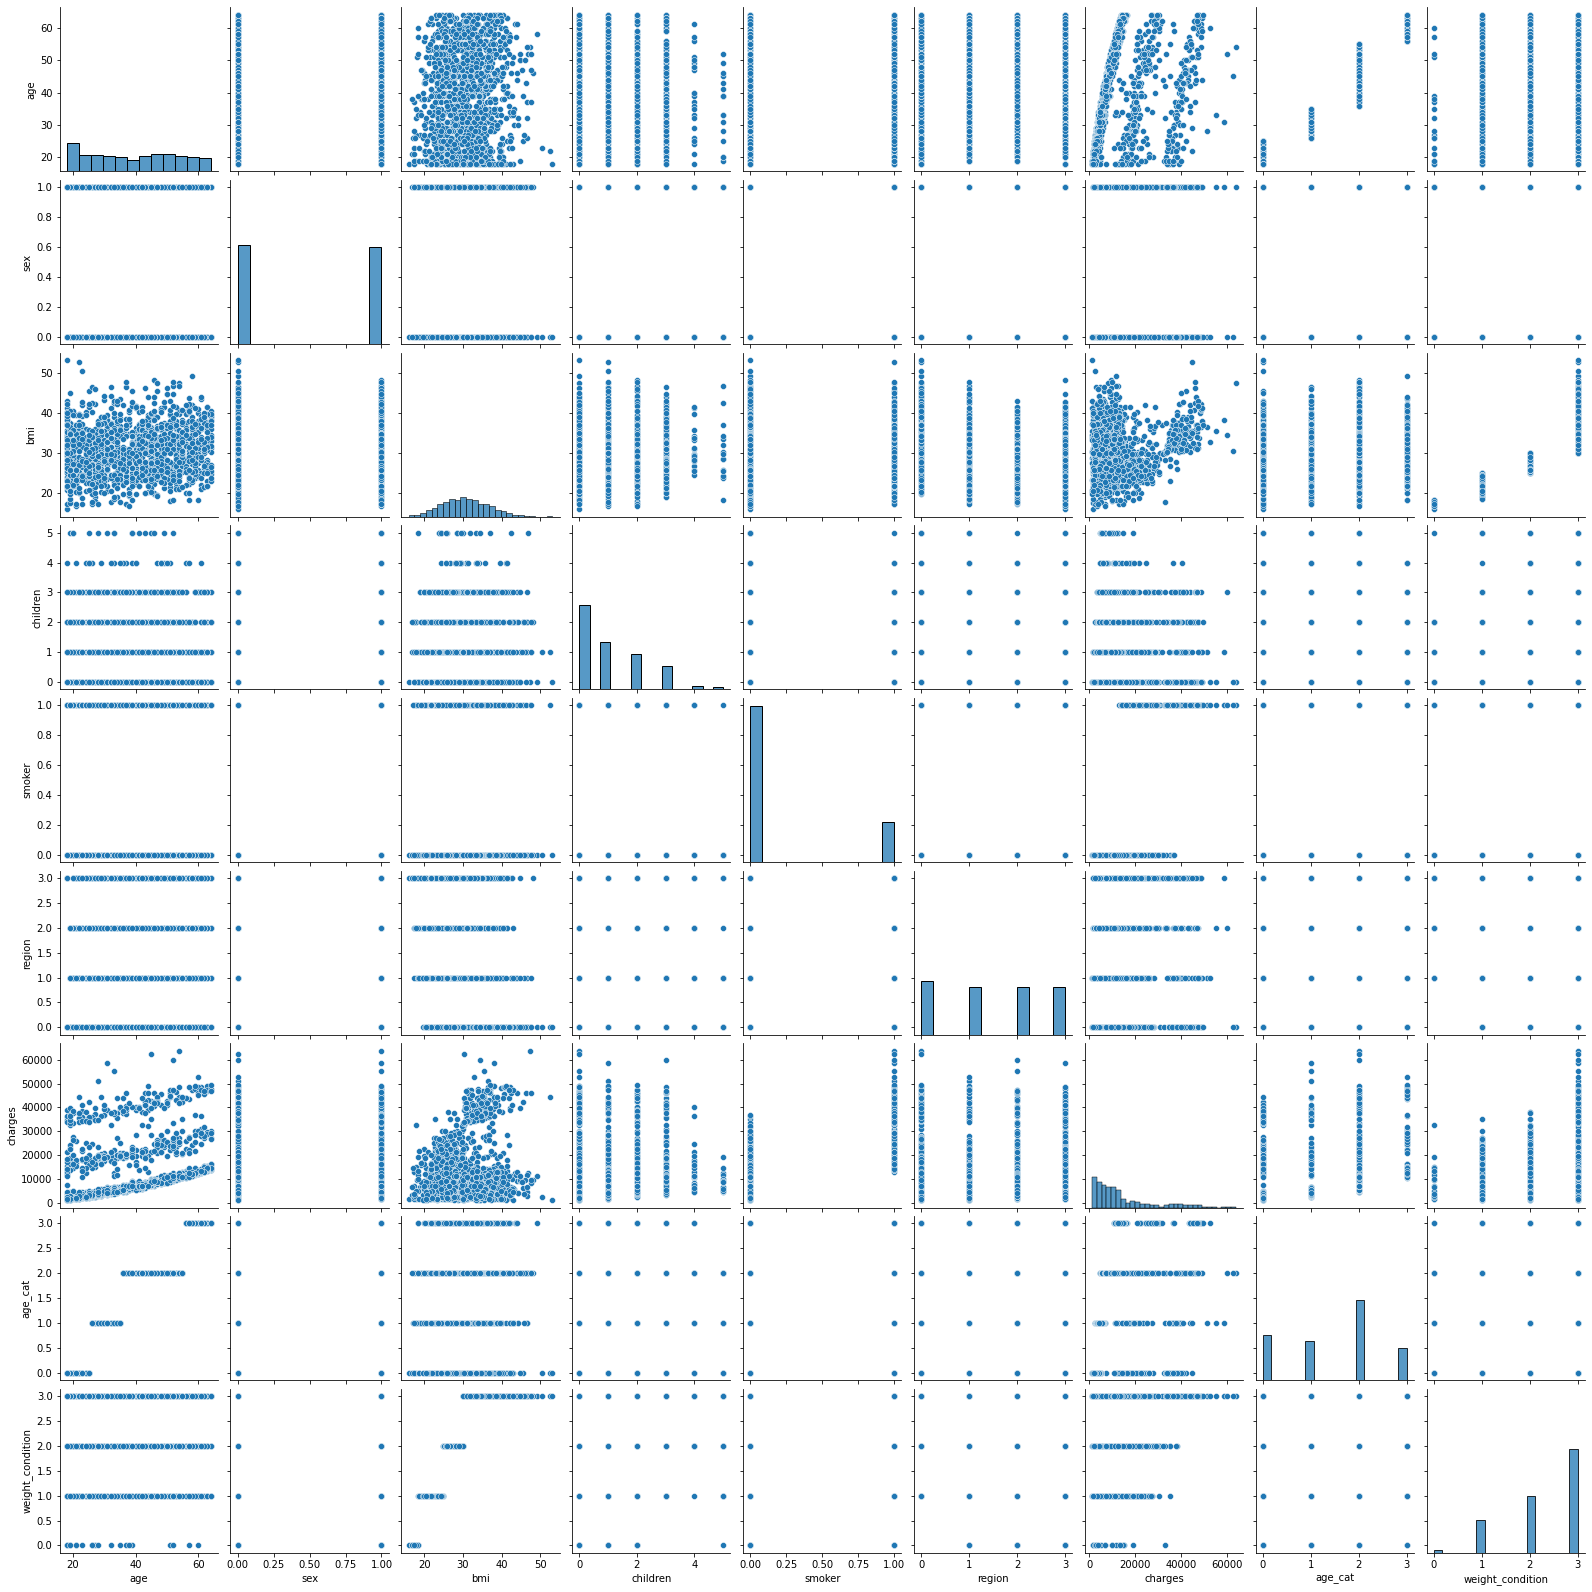

In [ ]:
sns.pairplot(df)

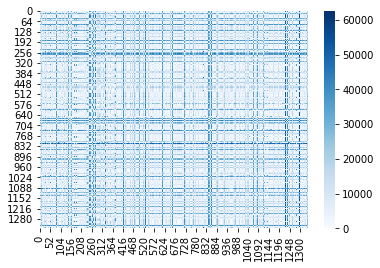

In [ ]:
sns.heatmap(squareform(cdist), cmap = "Blues")

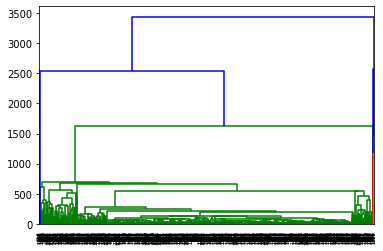

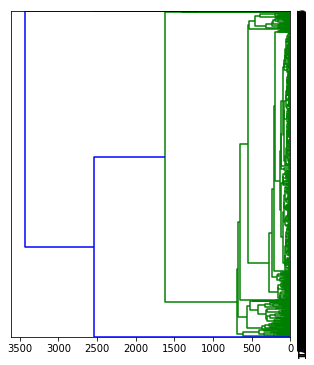

In [ ]:
hc1 = linkage(cdist)
#by default^ use single linkage to calc the distances
# now visualize the dendrogram

dendrogram(hc1, labels=df.index)

plt.figure(figsize=(5,6))
dendrogram(hc1,
           labels = df.index,
           orientation = "left",
           leaf_rotation=90,
           leaf_font_size=10)
plt.show()

In [ ]:
maxclustlabs = fcluster(hc1, 6, criterion="maxclust")
maxclustlabs

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

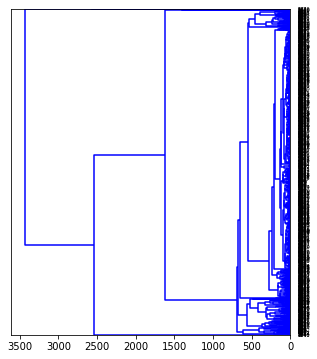

In [ ]:
# hc1 = linkage(cdist)
#by default^ use single linkage to calc the distances
# now visualize the dendrogram

# dendrogram(hc2, labels=df.index)

MAXCLUST = 6
plt.figure(figsize=(5,6))
dendrogram(hc1,
           labels = df.index,
           orientation = "left",
           color_threshold = MAXCLUST)
plt.axvline(x=MAXCLUST, c='grey', lw=1, linestyle='dashed')

In [ ]:
distlabs = fcluster(hc1, 80, "distance")
distlabs

array([106, 123, 125, ..., 123, 123, 155], dtype=int32)

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,Dist200
0,19,1,27.900,0,1,1,16884.92400,0,2,32
1,18,0,33.770,1,0,0,1725.55230,0,3,34
2,28,0,33.000,3,0,0,4449.46200,1,3,34
3,33,0,22.705,0,0,2,21984.47061,1,1,31
4,32,0,28.880,0,0,2,3866.85520,1,2,34


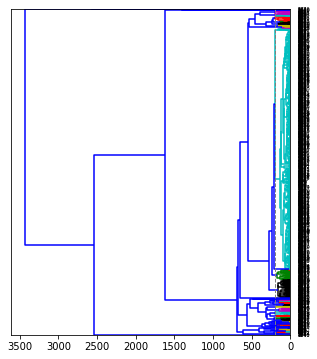

In [ ]:

DIST = 200
plt.figure(figsize=(5,6))
dendrogram(hc1,
           labels = df.index,
           orientation = "left",
           color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')

#assign number of label groups and assign labels column to cars
labels200 = fcluster(hc1, 200, "distance")
df['Dist200'] = labels200

df.head()

In [ ]:
# codist = pdist(df, "cosine")

# #linkage
# hc2 = linkage(codist)

# #plot 
# plt.figure(figsize=(5,6))
# dendrogram(hc2,
#            labels = df.index,
#            orientation = "left")
# plt.show()

# #assign number of label groups and assign labels column to cars
# labels8 = fcluster(hc2, 8, "maxclust")
# df['cosine8'] = labels8

# df.head()


In [ ]:
df.groupby('Dist200').mean()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
Dist200,,,,,,,,,
1,58.166667,0.333333,36.909167,1.833333,1.000000,0.833333,47371.580408,2.666667,3.000000
2,60.600000,0.200000,34.513000,1.200000,1.000000,0.800000,46784.701470,2.800000,3.000000
3,47.600000,0.600000,40.448000,2.600000,1.000000,1.200000,46170.251920,2.200000,3.000000
4,51.000000,0.333333,39.593333,0.666667,1.000000,1.666667,45758.478400,2.333333,3.000000
5,56.857143,0.428571,39.557143,0.857143,1.000000,1.000000,48727.950173,2.714286,3.000000
6,61.500000,1.000000,35.282500,1.000000,1.000000,2.000000,47912.410675,3.000000,3.000000
7,60.000000,0.000000,39.900000,0.000000,1.000000,1.000000,48173.361000,3.000000,3.000000
8,64.000000,0.000000,36.960000,2.000000,1.000000,0.000000,49577.662400,3.000000,3.000000
9,44.142857,0.428571,38.492857,1.285714,1.000000,0.571429,44430.809196,1.571429,3.000000


In [ ]:
# #Scaling variables allows each of the variables to have equal importance with same unit scale

sc = StandardScaler()
df_scale = sc.fit_transform(df)


In [ ]:
type(df_scale)
df_scale.shape
df_scale = pd.DataFrame(df_scale, columns = df.columns, index = df.index)
df_scale.head(3)

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,Dist200
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,-0.402874,0.298584,-1.481493,-0.410618,-0.012891
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-1.288007,-0.953689,-1.481493,0.832385,0.295122
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-1.288007,-0.728675,-0.496285,0.832385,0.295122


In [ ]:
df_scale.describe()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition,Dist200
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.853691e-16,4.646673e-17,-1.869041e-16,2.721623e-17,2.142448e-16,-7.700202e-17,-5.758556e-17,1.787310e-16,-9.459299e-18,3.446836e-16
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-9.895908e-01,-2.412011e+00,-9.086137e-01,-5.074631e-01,-1.288007e+00,-1.003557e+00,-1.481493e+00,-2.896624e+00,-4.787102e+00
25%,-8.691547e-01,-9.895908e-01,-7.164063e-01,-9.086137e-01,-5.074631e-01,-1.288007e+00,-7.046504e-01,-4.962853e-01,-4.106183e-01,2.951222e-01
50%,-1.474046e-02,-9.895908e-01,-4.320880e-02,-7.876719e-02,-5.074631e-01,-4.028743e-01,-3.212089e-01,4.889220e-01,8.323845e-01,2.951222e-01
75%,8.396738e-01,1.010519e+00,6.611572e-01,7.510793e-01,-5.074631e-01,4.822584e-01,2.783441e-01,4.889220e-01,8.323845e-01,2.951222e-01
max,1.765289e+00,1.010519e+00,3.685522e+00,3.240619e+00,1.970587e+00,1.367391e+00,4.171663e+00,1.474129e+00,8.323845e-01,2.605224e+00


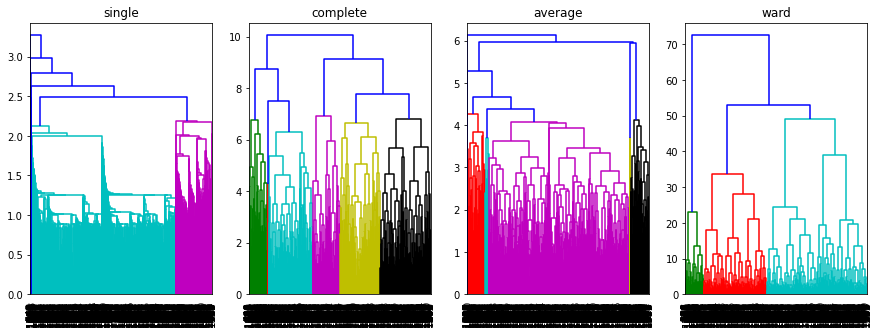

In [ ]:
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))


# loop and build our plot
for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(df_scale.values, method=m),
             labels = df_scale.index,
             leaf_rotation=90,
             leaf_font_size=10)
  
plt.show()


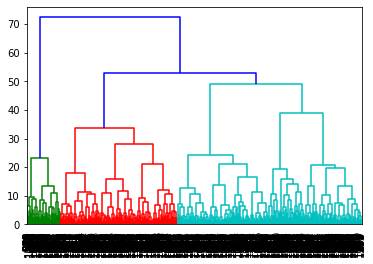

In [ ]:
wlink = linkage(df_scale.values, method="ward")
dendrogram(wlink,
          labels = df_scale.index,
          leaf_rotation=90,
          leaf_font_size=10)

plt.show()

In [ ]:
wlink

array([[1.95000000e+02, 5.81000000e+02, 0.00000000e+00, 2.00000000e+00],
       [6.36000000e+02, 1.01600000e+03, 1.55842294e-02, 2.00000000e+00],
       [3.47000000e+02, 5.56000000e+02, 1.55842294e-02, 2.00000000e+00],
       ...,
       [2.66800000e+03, 2.67100000e+03, 4.89606537e+01, 7.35000000e+02],
       [2.67000000e+03, 2.67200000e+03, 5.28945862e+01, 1.20400000e+03],
       [2.66700000e+03, 2.67300000e+03, 7.24219933e+01, 1.33800000e+03]])

In [ ]:
added_dist = wlink[:,2]
added_dist

array([0.00000000e+00, 1.55842294e-02, 1.55842294e-02, ...,
       4.89606537e+01, 5.28945862e+01, 7.24219933e+01])

In [ ]:
penalty = np.diff(added_dist)
penalty[-5:]

array([ 5.40040535,  5.30376669, 10.09941532,  3.93393248, 19.52740713])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


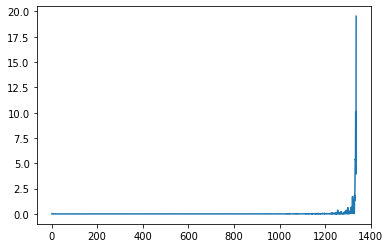

In [ ]:
# elbow method - what clustering step starts to show signs of explosion in distance
# remember, we lost one via the diff

sns.lineplot(range(1, len(penalty)+1), penalty)

In [ ]:
# set the clusters based on max dist
#making the cut off based on when the chart goes up, make the max distance for a cluster at 5.5
labs2 = fcluster(wlink, 5.5, "distance")
labs2

array([60, 31, 35, ..., 23, 24, 67], dtype=int32)

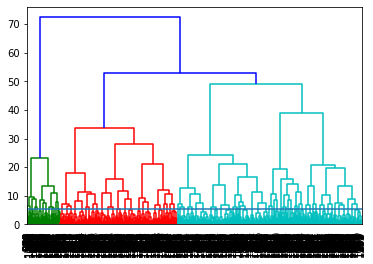

In [ ]:
# plot it

dendrogram(wlink,
          labels = df_scale.index,
          leaf_rotation=90,
          leaf_font_size=10)
plt.axhline(y=5.5)
plt.show()

In [ ]:
labs2

array([60, 31, 35, ..., 23, 24, 67], dtype=int32)

In [ ]:
# import random
# from sklearn.model_selection import train_test_split
# random.seed(820)

# x = df.drop(['charges'], axis = 1)
# y = df.charges

# x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)


In [ ]:
# a = np.stack([x_train,y_train])
# a_df = pd.DataFrame(x_train,y_train)
# a_df

In [ ]:
# df_scale